In [1]:
# Installing Selenium library
!pip install selenium

In [2]:
#imorting all required libraries
import selenium
import pandas as pd
from selenium import webdriver

# Que--1 and 2

In [11]:
#connecting to web driver
driver = webdriver.Chrome(r"E:\FRT\chromedriver.exe")

In [12]:
driver.get(' https://www.amazon.in')

In [9]:
# creating empty lists for scraping data
name=[]
price=[]
expected_del=[]
P1_url=[]
rating=[]
no_of_ratings=[]


In [13]:
search_bar = driver.find_element_by_id("twotabsearchtextbox")    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("mobiles")                                   # sending user input to search bar
search_button = driver.find_element_by_xpath('//span[@id="nav-search-submit-text"]')       # Locating search_button by xpath
search_button.click()                                                                      # clicking the search button

In [14]:
import time

In [15]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

In [19]:
#scraping all data
for i in range(0,3):
    name_tags=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']")
    for i in name_tags:
        name.append(i.text)
     
  
    try:
        price_tags=driver.find_elements_by_xpath("//span[@class='a-price-whole']")
        for j in price_tags:
            price.append(j.text)
    except NoSuchElementException:
         price.append("-")
      
    try:   
        exp_del_tags= driver.find_elements_by_xpath("//span[@class='a-text-bold']") 
        for l in exp_del_tags:
            expected_del.append(l.text)
    except NoSuchElementException:
        expected_del.append('-')
        
        
    try:   
        no_of_rating_tags= driver.find_elements_by_xpath("//span[@class='a-size-base']") 
        for l in no_of_rating_tags:
            no_of_ratings.append(l.text)
    except NoSuchElementException:
        no_of_ratings.append('-')
        
  
   
    driver.find_element_by_xpath("//li[@class='a-normal']").click()
    time.sleep(3)

In [24]:
P1_url=[]

In [25]:
#scraping urls
for i in range(0,10):
    try:   
        url_tags= driver.find_elements_by_xpath("//img[@class='s-image']") 
        for l in url_tags:
             P1_url.append(l.get_attribute('src'))
    except NoSuchElementException:
        P1_url.append('-')  
        
    driver.find_element_by_xpath("//li[@class='a-last']").click()
    time.sleep(3)

In [28]:
Ratings=[]

In [42]:
#scraping ratings
urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")        #collecting urls of all the mobiles
UR=[]
for i in urls[:10]:
    UR.append(i.get_attribute('href'))                      #getting the url
for url in UR:                                            #loop for every mobile in the list
    driver.get(url)
    
    try:                                                               #exception handling for nosuchelementexception
        rate=driver.find_element_by_xpath("//span[@id='acrCustomerReviewText']")       #locating the ratingd link
        rate.click()                                                                  #click the rating link found
        for i in range(0,10):
            rating=driver.find_element_by_xpath("//span[@class='a-size-medium a-color-base']")     #locating the rating
            Ratings.append(rating.text)                    #appending the ratings in Ratings list
            driver.find_element_by_xpath("//li[@class='a-normal']").click()
            time.sleep(3)
    except NoSuchElementException   as e:
        Ratings.append("NO rating")                   #appending the No rating if no rating is there
        

In [44]:
import pandas as pd
Data=pd.DataFrame({})
Data['Name']=name[0:134]
Data['Price']=price[0:134]
Data['expected_delivery']=expected_del[0:134]
Data['No of Ratings']=no_of_ratings[0:134] 
Data['Ratings']=Ratings[0:134] 
Data['url']=P1_url[0:134] 

In [45]:
Data

,Name,Price,expected_delivery,No of Ratings,Ratings,url
0,New Apple iPhone 12 Mini (64GB) - Blue,"66,900","Tomorrow, February 3",289,4.3 out of 5,https://m.media-amazon.com/images/I/71i+-WmxHW...
1,"Samsung Galaxy M02s (Red,4GB RAM, 64GB Storage...","9,999","Tomorrow, February 3",568,NO rating,https://m.media-amazon.com/images/I/71IkA3T7hI...
2,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage)","8,999",Tomorrow 11AM,"10,038",3.8 out of 5,https://m.media-amazon.com/images/I/71KCwNV6Mu...
3,"Redmi 9A (Nature Green, 2GB Ram, 32GB Storage)","6,999","Thursday, February 4","12,389",NO rating,https://m.media-amazon.com/images/I/71BFG8Zu7z...
4,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...","6,999","Thursday, February 4","128,380",3 out of 5,https://m.media-amazon.com/images/I/81mtDLql+X...
...,...,...,...,...,...,...
129,"Samsung Galaxy M01 Core (Red, 2GB RAM, 32GB St...","11,490","Tomorrow, February 3","8,370",NO rating,https://m.media-amazon.com/images/I/710BAQVOHd...
130,"OPPO A5S (Black, 3GB RAM, 32GB Storage) With N...","9,990","Tomorrow, February 3","3,828",NO rating,https://m.media-amazon.com/images/I/71YW54xTE1...
131,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...","8,490","Tomorrow, February 3","28,332",NO rating,https://m.media-amazon.com/images/I/61Q1fjPbWm...
132,"Redmi 9A (Midnight Black, 3GB Ram, 32GB Storage)","7,990",Tomorrow 11AM,"12,389",5 out of 5,https://m.media-amazon.com/images/I/91Lr-OxVKj...


In [46]:
Data.to_csv()         # saving data

',Name,Price,expected_delivery,No of Ratings,Ratings,url\r\n0,New Apple iPhone 12 Mini (64GB) - Blue,"66,900","Tomorrow, February 3",289,4.3 out of 5,https://m.media-amazon.com/images/I/71i+-WmxHWL._AC_UY218_.jpg\r\n1,"Samsung Galaxy M02s (Red,4GB RAM, 64GB Storage) | 5000 mAh | Triple Camera","9,999","Tomorrow, February 3",568,NO rating,https://m.media-amazon.com/images/I/71IkA3T7hIL._AC_UY218_.jpg\r\n2,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage)","8,999",Tomorrow 11AM,"10,038",3.8 out of 5,https://m.media-amazon.com/images/I/71KCwNV6MuL._AC_UY218_.jpg\r\n3,"Redmi 9A (Nature Green, 2GB Ram, 32GB Storage)","6,999","Thursday, February 4","12,389",NO rating,https://m.media-amazon.com/images/I/71BFG8Zu7zL._AC_UY218_.jpg\r\n4,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB Storage)","6,999","Thursday, February 4","128,380",3 out of 5,https://m.media-amazon.com/images/I/81mtDLql+XL._AC_UY218_.jpg\r\n5,"Redmi 9A (Sea Blue, 2GB Ram, 32GB Storage)","5,999",Tomorrow 11AM,"12,389",NO rating,https

# Que--3

In [67]:
#connecting to web driver
driver = webdriver.Chrome(r"E:\FRT\chromedriver.exe")

In [68]:
driver.get('https://images.google.com/?gws_rd=ssl')

In [69]:
search_bar = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')    # Locating searc_bar by xpath
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("fruits")                                   # sending user input to search bar
search_button = driver.find_element_by_xpath('//button[@class="Tg7LZd"]')       # Locating search_button by xpath
search_button.click() 

In [50]:
# creating empty lists for scraping data
fruits=[]
cars=[]
ml=[]

In [72]:
#scraping fruits image data
search_bar = driver.find_element_by_xpath('//input[@class="mye4qd"]')
fruits_tags=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
for i in fruits_tags:
    fruits.append(i.get_attribute('src'))
     

In [62]:
search_bar = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("cars")                                   # sending user input to search bar

search_button = driver.find_element_by_xpath('//button[@class="Tg7LZd"]')       # Locating search_button by xpath
search_button.click() 
  

In [65]:
#scraping cars image data
search_bar = driver.find_element_by_xpath('//input[@class="mye4qd"]')
car_tags=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
for j in car_tags:
    cars.append(j.get_attribute('src'))

In [58]:
#scraping machine learning image data
search_bar = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("machine learning")                                   # sending user input to search bar

search_button = driver.find_element_by_xpath('//button[@class="Tg7LZd"]')       # Locating search_button by xpath
search_button.click() 

search_bar = driver.find_element_by_xpath('//input[@class="mye4qd"]')
ml_tags=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
for k in ml_tags:
    ml.append(k.get_attribute('src')) 
    

In [75]:
import pandas as pd
Image_Data=pd.DataFrame({})
Image_Data['fruits']=fruits[0:98]
Image_Data['cars']=cars[0:98]
Image_Data['ml']=ml[0:98]

In [76]:
Image_Data

,fruits,cars,ml
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...,...,...
93,None,https://encrypted-tbn0.gstatic.com/images?q=tb...,None
94,None,https://encrypted-tbn0.gstatic.com/images?q=tb...,None
95,None,https://encrypted-tbn0.gstatic.com/images?q=tb...,None
96,None,https://encrypted-tbn0.gstatic.com/images?q=tb...,None


',fruits,cars,ml\r\n0,"","",""\r\n1,"","",""\r\n2,"","",""\r\n3,"","",""\r\n4,"","",""\r\n5,"","",""\r\n6,"","",""\r\n7,"","",""\r\n8,"","",""\r\n9,"","",""\r\n10,"","",""\r\n11,"","",""\r\n12,"","",""\r\n13,"","",""\r\n14,"","",""\r\n15,"","",""\r\n16,"","",""\r\n17,"","",""\r\n18,"","",""\r\n19,"","",""\r\n20,,,\r\n21,,,\r\n22,,,\r\n23,,,\r\n24,,,\r\n25,,,\r\n26,,,\r\n27,,,\r\n28,,,\r\n29,,,\r\n30,,,\r\n31,,,\r\n32,,,\r\n33,,,\r\n34,,,\r\n35,,,\r\n36,,,\r\n37,,,\r\n38,,,\r\n39,,,\r\n40,,,\r\n41,,,\r\n42,,,\r\n43,,,\r\n44,,,\r\n45,,,\r\n46,,,\r\n47,,,\r\n48,,,\r\n49,"","",""\r\n50,"","",""\r\n51,"","",""\r\n52,"","",""\r\n53,"","",""\r\n54,"","",""\r\n55,"","",""\r\n56,"","",""\r\n57,"","",""\r\n58,"","",""\r\n59,"","",""\r\n60,"","",""\r\n61,"","",""\r\n62,"","",""\r\n63,"","",""\r\n64,"","",""\r\n65,"","",""\r\n66,"","",""\r\n67,"","",""\r\n68,"","",""\r\n69,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdAYwUpNeIIH6xkNpAr_kn-QJTtxaZjP-0sA&usqp=CAU,\r\n70,,https://encrypted
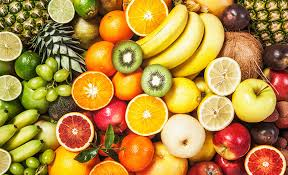
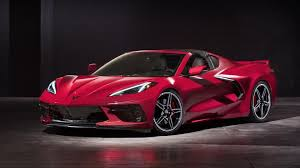
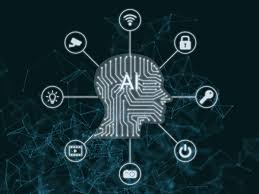
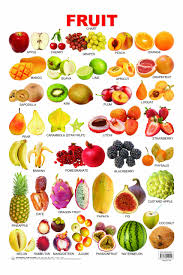
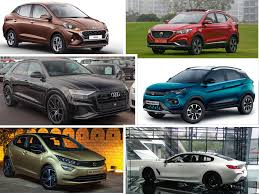
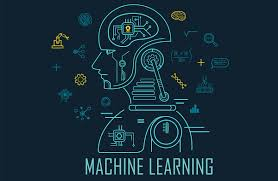
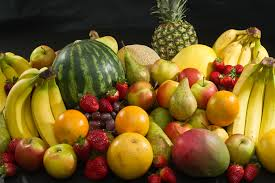
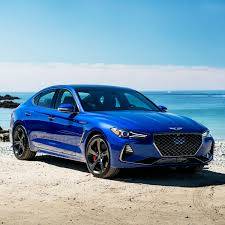
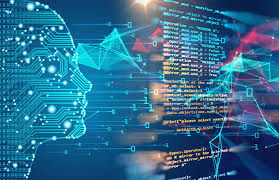
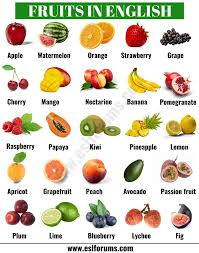
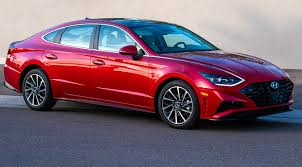
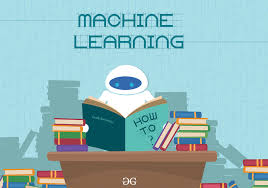
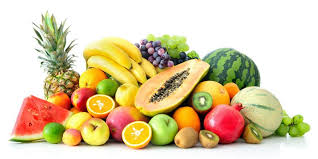
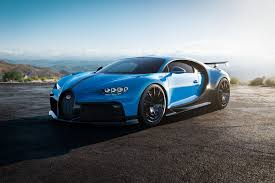
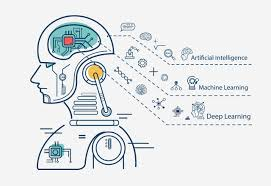
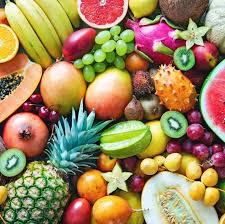
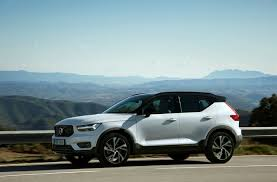
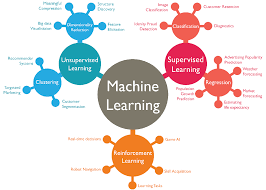
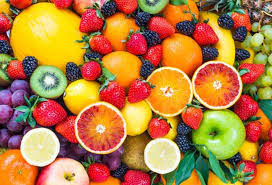
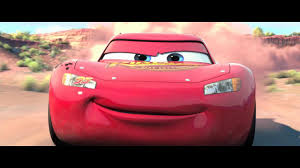
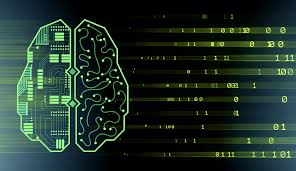
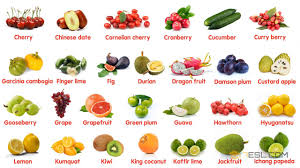
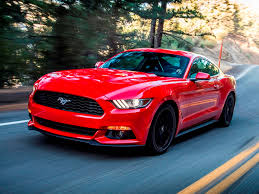
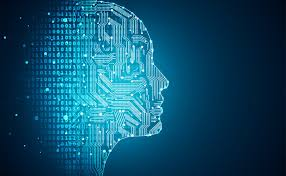
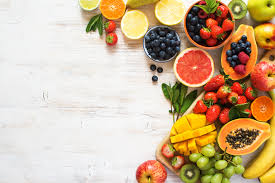
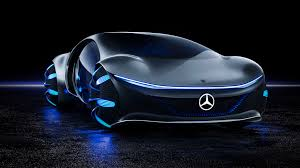
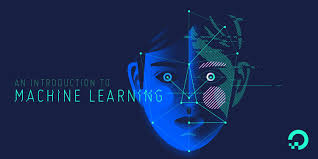
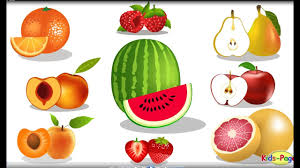
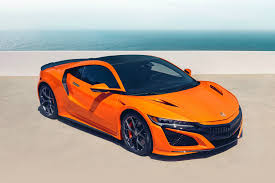
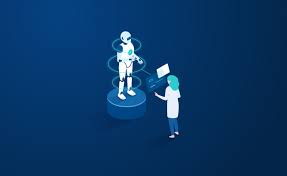
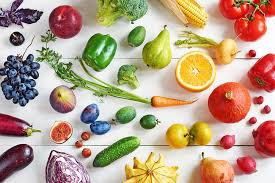
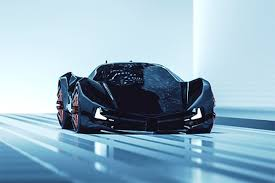
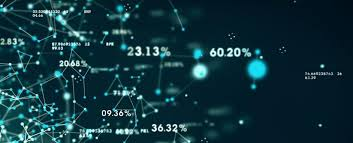
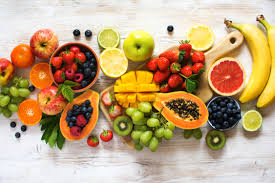
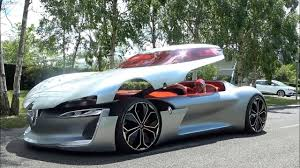
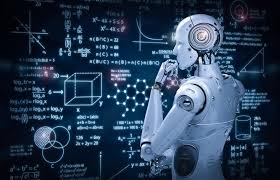
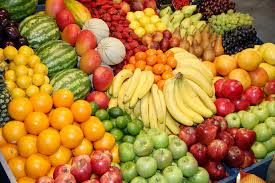
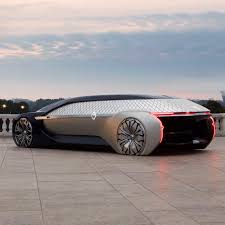
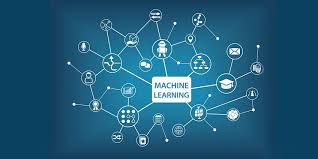
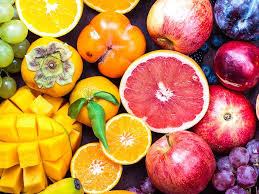
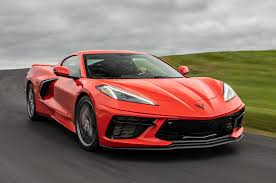
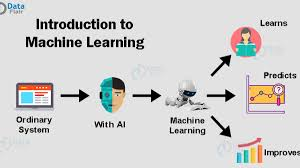
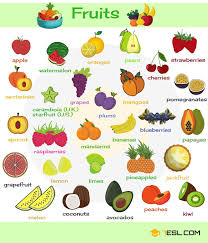
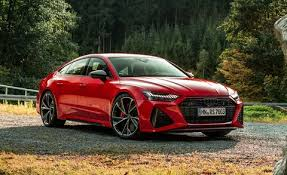
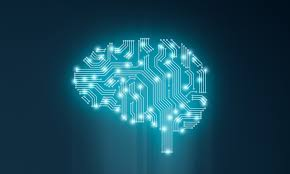
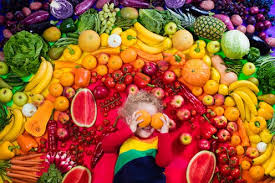
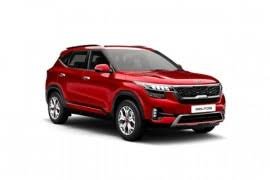
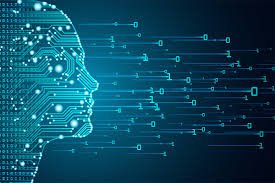
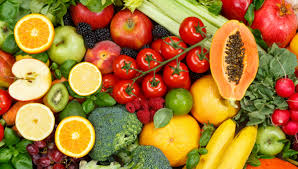
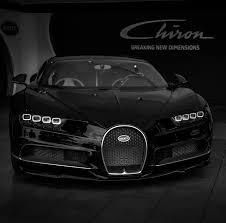
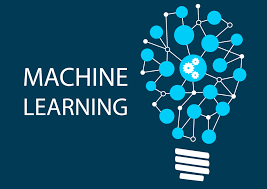
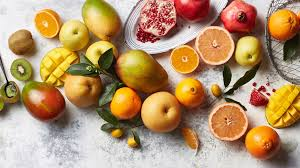
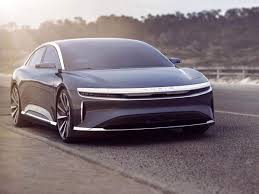
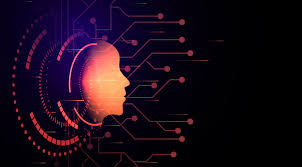
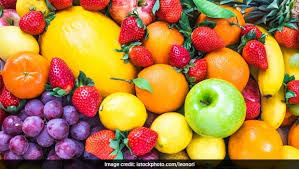
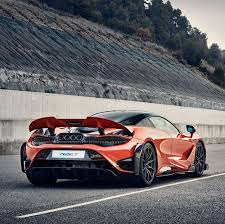
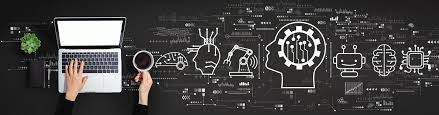
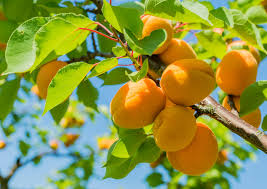
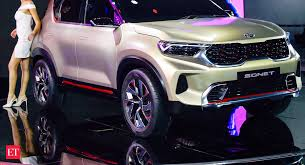
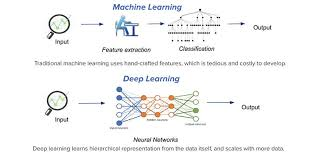
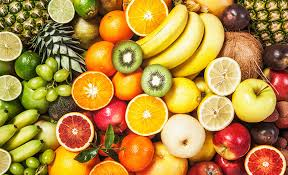
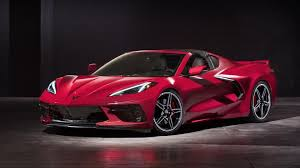
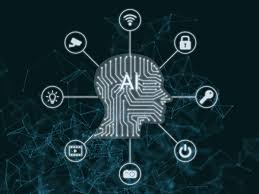
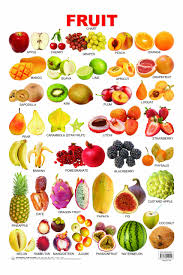
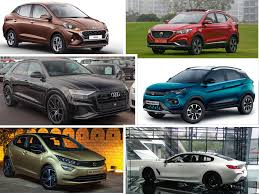
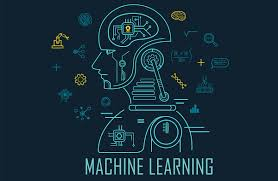
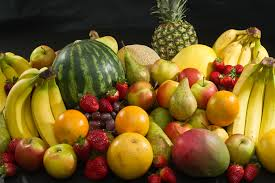
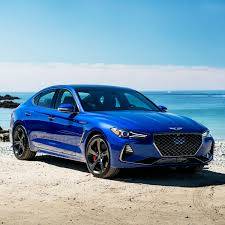
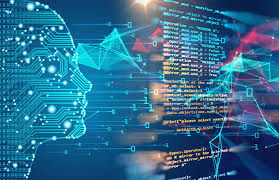
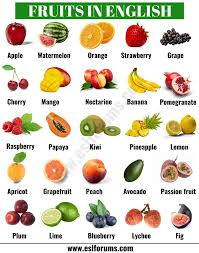
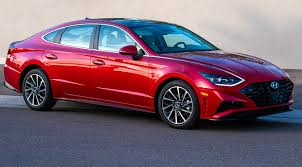
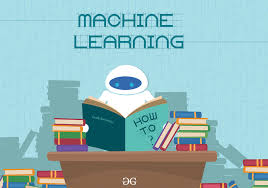
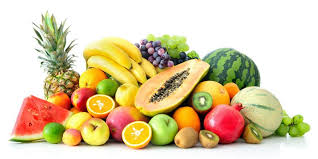
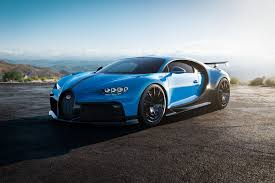
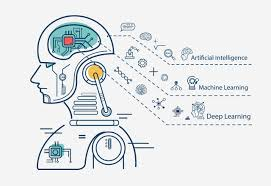
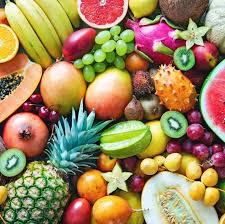
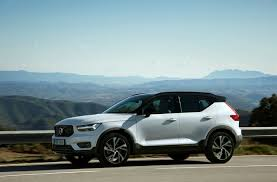
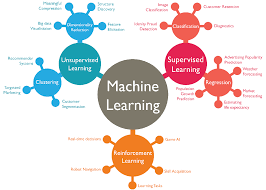
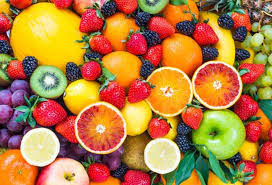
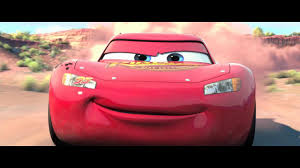
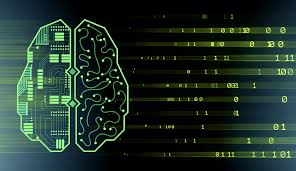
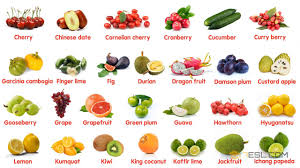
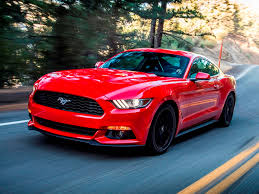
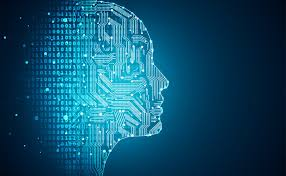
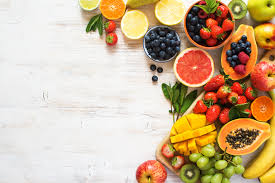
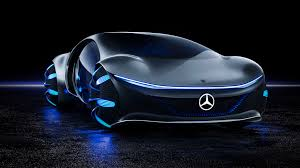
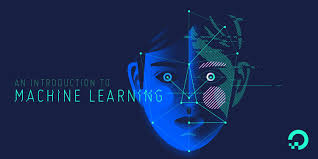
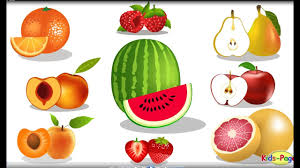
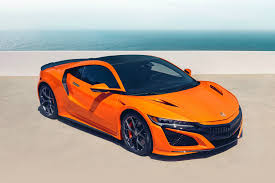
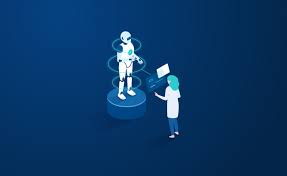
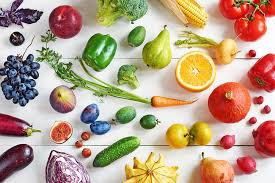
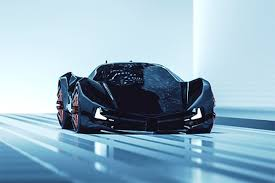
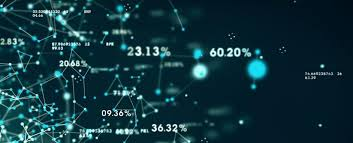
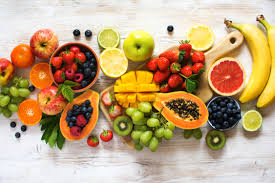
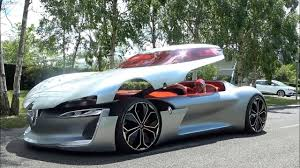
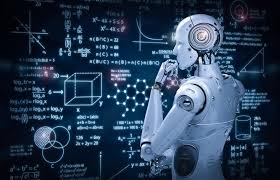
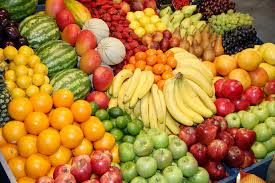
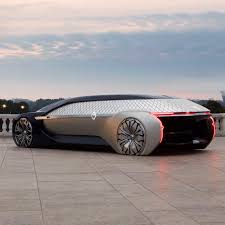
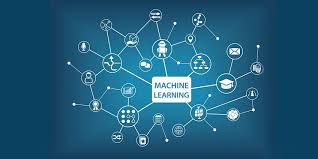
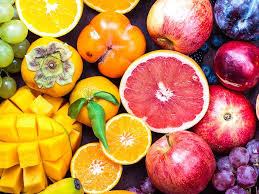
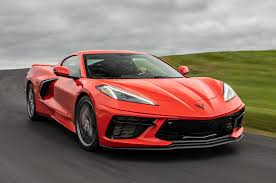
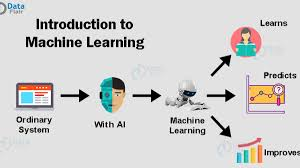
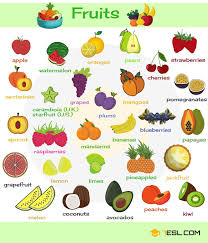
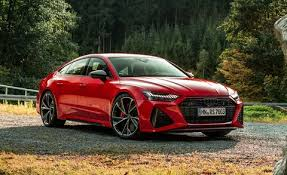
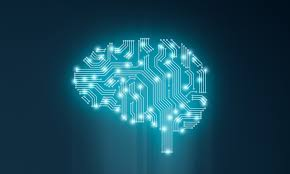
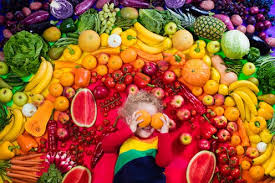
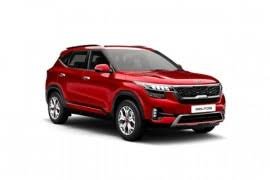
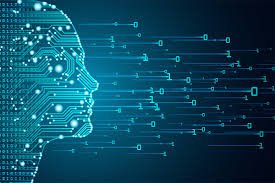
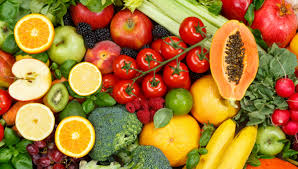
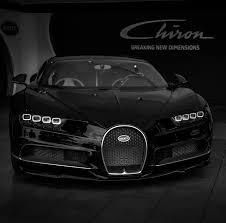
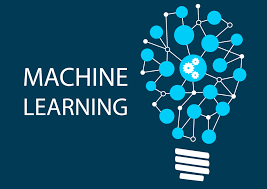
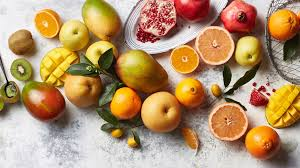
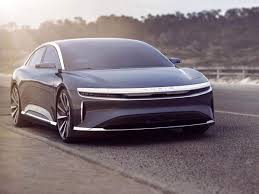
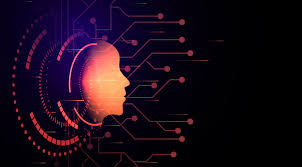
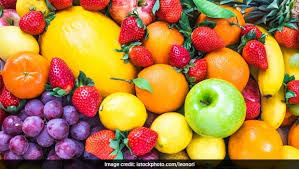
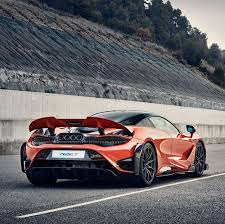
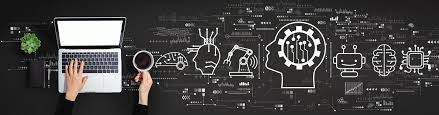
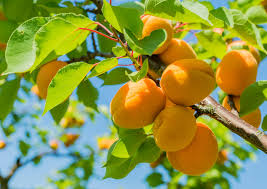
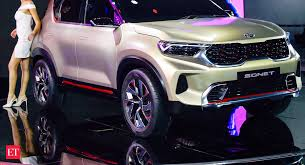
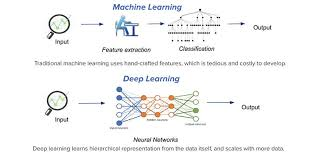

In [77]:
Image_Data.to_csv()          # saving data

# Que--4

In [24]:
#connecting to web driver
driver = webdriver.Chrome(r"E:\FRT\chromedriver.exe")

In [25]:
url='https://www.flipkart.com/'

In [26]:
# Lets open the web page through the web driver
driver.get(url)

In [27]:
search_bar = driver.find_element_by_xpath('//input[@class="_3704LK"]')    # Locating searc_bar by xpath
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("smartphones")                                   # sending user input to search bar
search_button = driver.find_element_by_xpath('//button[@class="L0Z3Pu"]')       # Locating search_button by xpath
search_button.click() 

In [10]:
# creating empty lists for scraping data
Name=[]
ram=[]
storage=[]
primary_cam=[]
sec_cam=[]
display_size=[]
display_res=[]
processor=[]
proc_cores=[]
battery_cap=[]
price=[]
url=[]


In [11]:
import time

In [12]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

In [17]:
# scraping all data
for i in range(0,10):
    try:
        Name_tags=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
        for j in Name_tags:
            Name.append(j.text)
    except NoSuchElementException:
        Name.append("-")
    
    try:
        price_tags=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
        for k in price_tags:
            price.append(k.text)
    except NoSuchElementException:
         price.append("-")
      
    try: 
        storage_tags=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[1]")
        for l in storage_tags:
            storage.append(l.text)
    except NoSuchElementException:
        storage.append('-')
        
        
    try: 
        ram_tags=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[1]")
        for m in ram_tags:
            ram.append(m.text)
        
    except NoSuchElementException:
        ram.append('-')
        
    try: 
        primary_cam_tags=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[3]")
        for n in primary_cam_tags:
            primary_cam.append(n.text)
        
    except NoSuchElementException:
        primary_cam.append('-')      
    
    try: 
        sec_cam_tags=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[3]")
        for o in sec_cam_tags:
            sec_cam.append(o.text)
        
    except NoSuchElementException:
        sec_cam.append('-')  
        
     
    try:
        display_size_tags=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[2]")
        for p in display_size_tags:
            display_size.append(p.text)
        
    except NoSuchElementException:
         display_size.append('-') 
        
    try:
        display_res_tags=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[2]")
        for q in display_res_tags:
            display_res.append(q.text)
    
    except NoSuchElementException:
         display_res.append('-')
            
           
    try:
        processor_tags=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[5]")
        for r in processor_tags:
            processor.append(r.text)
    except NoSuchElementException:
         processor.append('-')
            
    try:
        battery_cap_tags=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[4]")
        for s in battery_cap_tags:
            battery_cap.append(s.text)
    except NoSuchElementException:
         battery_cap.append('-')  
            
    try:
        url_tags= driver.find_elements_by_xpath("//img[@class='_396cs4 _3exPp9']") 
        for t in url_tags:
            url.append(t.get_attribute('src'))
        
    except NoSuchElementException:
         url.append('-')          
    driver.find_element_by_xpath("//a[@class='_1LKTO3']").click()
    time.sleep(3)

In [30]:
import pandas as pd
Data=pd.DataFrame({})
Data['Name']=Name[0:240]
Data['price']=price[0:240]
Data['storage']=storage[0:240]
Data['primary_cam']=primary_cam[0:240]
Data['display_size']=display_size[0:240]
Data['ram']=ram[0:240]
Data['processor']=processor[0:240]
Data['sec_cam']=sec_cam[0:240]
Data['display_res']=display_res[0:240]
Data['battery_cap']=battery_cap[0:240]
Data['url']=url[0:240]


In [31]:
Data

,Name,price,storage,primary_cam,display_size,ram,processor,sec_cam,display_res,battery_cap,url
0,"POCO M2 (Slate Blue, 64 GB)","₹9,999",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,MediaTek Helio G80 Processor,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,https://www.flipkart.com/search?q=smartphone&s...
1,"POCO C3 (Arctic Blue, 64 GB)","₹8,499",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Mediatek Helio G35 Processor,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,5000 mAh Li-ion Polymer Battery,https://www.flipkart.com/search?q=smartphone&s...
2,"POCO M2 (Pitch Black, 64 GB)","₹9,999",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,MediaTek Helio G80 Processor,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,https://www.flipkart.com/search?q=smartphone&s...
3,"Realme Narzo 20A (Victory Blue, 64 GB)","₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,12MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Qualcomm Snapdragon 665 Processor,12MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Lithium-ion Battery,https://www.flipkart.com/search?q=smartphone&s...
4,"Realme Narzo 20A (Glory Silver, 64 GB)","₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,12MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Qualcomm Snapdragon 665 Processor,12MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Lithium-ion Battery,https://www.flipkart.com/search?q=smartphone&s...
...,...,...,...,...,...,...,...,...,...,...,...
235,"POCO C3 (Lime Green, 32 GB)","₹7,499",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,Mediatek Helio G35 Processor,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,5000 mAh Li-ion Polymer Battery,https://www.flipkart.com/search?q=smartphone&s...
236,"Realme 7 (Mist Blue, 64 GB)","₹14,999",6 GB RAM | 64 GB ROM | Expandable Upto 256 GB,64MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,6 GB RAM | 64 GB ROM | Expandable Upto 256 GB,MediaTek Helio G95 Processor,64MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,5000 mAh Lithium-ion Battery,https://www.flipkart.com/search?q=smartphone&s...
237,"Realme 6i (Lunar White, 64 GB)","₹13,999",6 GB RAM | 64 GB ROM | Expandable Upto 256 GB,48MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,6 GB RAM | 64 GB ROM | Expandable Upto 256 GB,MediaTek Helio G90T Processor,48MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,4300 mAh Battery,https://www.flipkart.com/search?q=smartphone&s...
238,"POCO C3 (Matte Black, 32 GB)","₹7,499",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,Mediatek Helio G35 Processor,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,5000 mAh Li-ion Polymer Battery,https://www.flipkart.com/search?q=smartphone&s...


# Que--5

In [62]:
#connecting to web driver
driver = webdriver.Chrome(r"E:\FRT\chromedriver.exe")

In [52]:
import requests
import urllib.parse

In [63]:
address = 'Mumbai'

In [64]:
for i in address:
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +''
    driver.get(url)

In [65]:
# creating empty lists for scraping data
latitude=[]
longitude=[]

In [66]:
search_bar = driver.find_element_by_id("q")    # Locating searc_bar by id
search_bar.clear() 

In [67]:
for j in address:
    search_bar.send_keys(j)                                   # sending user input to search bar
    search_button = driver.find_element_by_xpath('//button[@class="btn btn-primary btn-sm mx-1"]')# Locating search_button by xpath
    search_button.click()  

In [68]:
 # Locating search_button by xpath
search_button = driver.find_element_by_xpath('//div[@class="leaflet-bar btn btn-sm btn-outline-secondary svelte-1vbvdrk leaflet-control"]')      
search_button.click()  

In [69]:
l=[]

In [70]:
# scraping data
l_tags=driver.find_elements_by_xpath("//div[@class='svelte-1b30dq3']/div")
for j in l_tags:
    l.append(j.text)

In [71]:
l

['map center: 19.08217,72.87803 view on osm.org\nmap zoom: 10\nviewbox: 72.36832,19.27615,73.38867,18.88680\nlast click: undefined\nmouse position: 19.24309,73.28152',
 'hide']

In [79]:
a=([s.strip('view on osm.org\nmap zoom: 10\nviewbox: 72.36832,19.27615,73.38867,18.88680\nlast click: undefined\nmouse position: 19.24309,73.28152') for s in l])
a=([s.replace('view on osm.org\nmap zoom: 10\nviewbox: 72.36832,19.27615,73.38867,18.88680\nlast click: undefined\nmouse position: 19.24309,73.28152','') for s in l])

In [81]:
b=([s.strip('map center:') for s in a])
b=([s.replace('map center:','') for s in a])

In [83]:
c=b[0]
c

' 19.08217,72.87803 '

In [84]:
data=c.split("\n")
i=0
while i<len(data):
    
    dd=data[i].split(',')
    print(dd)
    break

[' 19.08217', '72.87803 ']


In [85]:
latitude=dd[0]
latitude

' 19.08217'

In [86]:
longitude=dd[1]
longitude

'72.87803 '

In [113]:
data=[]

In [114]:
data.append(latitude)


In [115]:
data.append(longitude)

In [116]:
data

[' 19.08217', '72.87803 ']

# Que--6

In [29]:
#connecting to web driver
driver = webdriver.Chrome(r"E:\FRT\chromedriver.exe")

In [30]:
url='https://trak.in/'

In [31]:
driver.get(url)

In [32]:
search_button = driver.find_element_by_xpath('//i[@class="fa fa-search"]')    # Locating searc_bar by xpath
search_button.click()                                               # clearing search_bar


In [33]:
# specifying the url of the webpage to be scraped
url = 'https://trak.in/india-startup-funding-investment-2015/'

In [34]:
# Lets open the web page through the web driver
driver.get(url)

In [56]:
# creating empty lists for scraping data
date=[]
startup=[]
industry=[]
city=[]
sub=[]
invester=[]
investment_type=[]
amount=[]

In [57]:
# scraping date data
try:
    date_tags=driver.find_elements_by_xpath("//td[@class='column-2']")
    for j in d_tags:
        date.append(j.text)
except NoSuchElementException:
        date.append("-")
    

In [58]:
# scraping startup data
try:
    startup_tags=driver.find_elements_by_xpath("//td[@class='column-3']")
    for j in startup_tags:
        startup.append(j.text)
except NoSuchElementException:
        startup.append("-")
    

In [59]:
# scraping industry data
try:
    industry_tags=driver.find_elements_by_xpath("//td[@class='column-4']")
    for j in industry_tags:
        industry.append(j.text)
except NoSuchElementException:
        industry.append("-")
    

In [60]:
# scraping sub-vertical data
try:
    sub_tags=driver.find_elements_by_xpath("//td[@class='column-5']")
    for j in sub_tags:
        sub.append(j.text)
except NoSuchElementException:
        sub.append("-")

In [61]:
# scraping city data
try:
    city_tags=driver.find_elements_by_xpath("//td[@class='column-6']")
    for j in city_tags:
        city.append(j.text)
except NoSuchElementException:
        city.append("-")

In [62]:
# scraping invester data
try:
    invester_tags=driver.find_elements_by_xpath("//td[@class='column-7']")
    for j in invester_tags:
        invester.append(j.text)
except NoSuchElementException:
        invester.append("-")

In [64]:
# scraping investment type data
try:
    in_type_tags=driver.find_elements_by_xpath("//td[@class='column-8']")
    for j in in_type_tags:
        investment_type.append(j.text)
except NoSuchElementException:
        investment_type.append("-")

In [65]:
# scraping amount data
try:
    am_tags=driver.find_elements_by_xpath("//td[@class='column-9']")
    for j in am_tags:
        amount.append(j.text)
except NoSuchElementException:
        amount.append("-")

In [74]:
import pandas as pd
Data=pd.DataFrame({})
Data['Date']=date[34:64]
Data['Startup']=startup[34:64]
Data['Industry']=industry[34:64]
Data['City']=city[34:64]
Data['Sub-Vertical']=sub[34:64]
Data['Invester']=invester[34:64]
Data['investment_type']=investment_type[34:64]
Data['Amount']=amount[34:64]

In [75]:
Data

,Date,Startup,Industry,City,Sub-Vertical,Invester,investment_type,Amount
0,08/09/2020,Byju’s,EduTech,Bangalore,Online Tutoring,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,12/09/2020,mCaffeine,Personal Care,Mumbai,Skincare & Haircare,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,09/09/2020,Qshala,EduTech,Bangalore,Online Curiosity Platform for Kids,Rainmatter Capital,Angel,"370,000"
3,02/09/2020,Winzo,Online Gaming,New Delhi,Online Gaming,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia",Video Customer Experience(CX) Platform,"Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,07/09/2020,Melorra,E-commerce,Bangalore,Online Jewelry Store,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,07/09/2020,1mg,E-commerce,Gurgaon,Online Pharmacy,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,31/08/2020,mfine,HealthTech,Bangalore,On-Demand Healthcare Services,Caretech Pte Inc,Series B,"5,400,000"
8,31/08/2020,Apna,Human Resources,Bangalore,Recruitment Platform,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,03/09/2020,Railofy,Transportation,Mumbai,WL & RAC protection platform,Chiratae Ventures,Seed,"950,000"


In [76]:
Data.to_csv()    # saving data

',Date,Startup,Industry,City,Sub-Vertical,Invester,investment_type,Amount\r\n0,08/09/2020,Byju’s,EduTech,Bangalore,Online Tutoring,"Silver Lake, Tiger Global, General Atlantic and Owl Ventures",Private Equity,"500,000,000"\r\n1,12/09/2020,mCaffeine,Personal Care,Mumbai,Skincare & Haircare,"Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1",Series B,"3,000,000"\r\n2,09/09/2020,Qshala,EduTech,Bangalore,Online Curiosity Platform for Kids,Rainmatter Capital,Angel,"370,000"\r\n3,02/09/2020,Winzo,Online Gaming,New Delhi,Online Gaming,"Kalaari Capital Partners, IndigoEdge Management Consultancy",Series B,"15,500,000"\r\n4,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia",Video Customer Experience(CX) Platform,"Alpha Wave Incubation, Exfinity Venture Partners and existing backers.",Series A,"4,500,000"\r\n5,07/09/2020,Melorra,E-commerce,Bangalore,Online Jewelry Store,"Shadow Holdings, Ligh

# Que--7

In [4]:
#connecting to web driver
driver = webdriver.Chrome(r"E:\FRT\chromedriver.exe")

In [129]:
# specifying the url of the webpage to be scraped
product="gaming"
p2="laptop"
url = 'https://www.digit.in/search/?keyword='+str(product)+'%20'+str(p2)

In [130]:
driver.get(url)

In [37]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

In [38]:
import time

In [109]:
# creating empty lists for scraping data
product_name1=[]
images2=[]
links1=[]

In [110]:
# scraping name tags
name_tags=driver.find_elements_by_xpath("//div[@class='searchProduct-desc']")
name_tags[0:3]

[<selenium.webdriver.remote.webelement.WebElement (session="d534729df9744f0222c85b0455710f2b", element="f4052dfd-3812-4676-8cc5-43cb74b06e98")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d534729df9744f0222c85b0455710f2b", element="253f236f-af33-4e29-bd00-e92a709427b9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d534729df9744f0222c85b0455710f2b", element="b1a60574-464b-4941-adbb-ef32c73a30f1")>]

In [111]:
# scraping product name data 
for i in name_tags:
    product_name1.append(i.text)
product_name1[0:3]

['ASUS TUF Gaming A15 Ryzen 9 4900H',
 'ASUS TUF Gaming FX505DD-AL185T',
 'Acer Predator Triton 700']

In [112]:
len(product_name1)

10

In [113]:
# scraping product image data
try:   
    images_tags= driver.find_elements_by_xpath("//div[@class='searchProduct-ickon']/img") 
    for l in images_tags:
        images2.append(l.get_attribute('src'))
except NoSuchElementException:
    images2.append('-') 

In [114]:
images2[0:3]

['https://static.digit.in/product/thumb_175000_product_td_300.jpeg',
 'https://static.digit.in/product/thumb_162277_product_td_300.jpeg',
 'https://static.digit.in/default/thumb_126456_default_td_300.png']

In [115]:
len(images2)

10

In [116]:
# scraping product link data
try:   
    links_tags= driver.find_elements_by_xpath("//div[@class='searchPage']/a") 
    for l in links_tags:
        links1.append(l.get_attribute('href'))
except NoSuchElementException:
    links1.append('-')  

In [117]:
links1[0:3]

['https://www.digit.in/laptops/asus-tuf-gaming-a15-ryzen-9-4900h-price-216641.html',
 'https://www.digit.in/laptops/asus-tuf-gaming-fx505dd-al185t-price-204511.html',
 'https://www.digit.in/laptops/acer-predator-triton-700-price-69350.html']

In [118]:
P=[]

In [119]:
# scraping product price data
urls=driver.find_elements_by_xpath("//div[@class='searchPage']/a")        #collecting urls of all the laptop
UR=[]
for i in urls[:10]:
    UR.append(i.get_attribute('href'))                      #getting the url of first 10 laptops
for ur in UR:                                            #loop for every laptop in the list
    driver.get(ur)
    try:                                                               #exception handling for nosuchelementexception
        p=driver.find_element_by_xpath("//div[@class='Block-price']")     #locating the rating
        P.append(p.text)                    #appending the ratings in Ratings list
            
    except NoSuchElementException as e:
        P.append("-")  
     

In [120]:
P

['Price : 96,990 (onwards)\nAvailable at 1 Store',
 'Price : 56,490 (onwards)\nAvailable at 1 Store',
 'Price : 299,999',
 'Price : 139,400',
 'Price : 149,999 (onwards)\nAvailable at 1 Store',
 'Price : 79,990 (onwards)\nAvailable at 1 Store',
 'Price : 84,552',
 'Price : 70,746 (onwards)\nAvailable at 1 Store',
 'Price : 409,999 (onwards)\nAvailable at 1 Store',
 'Price : 66,666 (onwards)\nAvailable at 2 Store']

In [121]:
b=([s.strip('(onwards)\nAvailable at 1 Store') for s in P])           # imputing price data
b=([s.replace('(onwards)\nAvailable at 1 Store','') for s in P])

In [122]:
p=([s.strip('Price :') for s in b])
p=([s.replace('Price :','') for s in b])

In [123]:
p

[' 96,990 ',
 ' 56,490 ',
 ' 299,999',
 ' 139,400',
 ' 149,999 ',
 ' 79,990 ',
 ' 84,552',
 ' 70,746 ',
 ' 409,999 ',
 ' 66,666 (onwards)\nAvailable at 2 Store']

In [70]:
os=[]

In [78]:
# scraping product os data
urls1=driver.find_elements_by_xpath("//div[@class='searchPage']/a")        #collecting urls of all the laptop
UR1=[]
for i in urls1[:10]:
    UR1.append(i.get_attribute('href'))                      #getting the url of first 10 laptops
for ur in UR1:                                            #loop for every laptop in the list
    driver.get(ur)
    try:                                                               #exception handling for nosuchelementexception
        os_tags=driver.find_element_by_xpath("//div[@class='value']")     #locating the rating
        os.append(os_tags.text)                    #appending the data to list
            
    except NoSuchElementException as e:
        os.append("-")  

In [79]:
os

['NA',
 'Windows 10 Pro',
 'Windows 10 Home',
 'Windows 10 Pro',
 'Windows 10 Home',
 'Windows 10',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Pro',
 'Pre-Loaded Windows 10 Home']

In [93]:
d=[]

In [124]:
import pandas as pd
Data=pd.DataFrame({})
Data['product_names']=product_name1[0:]
Data['Images']=images2[0:]
Data['Links']=links1[0:]
Data['Price']=p[0:]
Data['OS']=os[0:]

In [125]:
Data

,product_names,Images,Links,Price,OS
0,ASUS TUF Gaming A15 Ryzen 9 4900H,https://static.digit.in/product/thumb_175000_p...,https://www.digit.in/laptops/asus-tuf-gaming-a...,"96,990",NA
1,ASUS TUF Gaming FX505DD-AL185T,https://static.digit.in/product/thumb_162277_p...,https://www.digit.in/laptops/asus-tuf-gaming-f...,"56,490",Windows 10 Pro
2,Acer Predator Triton 700,https://static.digit.in/default/thumb_126456_d...,https://www.digit.in/laptops/acer-predator-tri...,"299,999",Windows 10 Home
3,MSI GE60 2PE,https://static.digit.in/product/thumb_27855_pr...,https://www.digit.in/laptops/msi-ge60-2pe-pric...,"139,400",Windows 10 Pro
4,Asus G750JX-CV069P,https://static.digit.in/product/thumb_27856_pr...,https://www.digit.in/laptops/asus-g750jx-cv069...,"149,999",Windows 10 Home
5,Asus TUF Gaming A15,https://static.digit.in/product/thumb_160275_p...,https://www.digit.in/laptops/asus-tuf-gaming-a...,"79,990",Windows 10
6,Asus TUF Gaming A17,https://static.digit.in/product/thumb_160282_p...,https://www.digit.in/laptops/asus-tus-gaming-a...,"84,552",Windows 10 Home
7,HP Pavilion Gaming 15 Core i5,https://static.digit.in/product/thumb_167962_p...,https://www.digit.in/laptops/hp-pavilion-gamin...,"70,746",Windows 10 Home
8,ASUS GX501 Zephyrus Gaming Laptop,https://static.digit.in/product/thumb_97461_pr...,https://www.digit.in/laptops/asus-gx501-zephyr...,"409,999",Windows 10 Pro
9,Asus TUF Gaming FX705DT,https://static.digit.in/product/thumb_132270_p...,https://www.digit.in/laptops/asus-tuf-gaming-f...,"66,666 (onwards)\nAvailable at 2 Store",Pre-Loaded Windows 10 Home
